<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Homework 1 - Russian Images
### 2/9/2022
### *** Alex Lagarde ***
The goal of this assignment is to take the digitized Prokudin-Gorskii glass plate images and, using image processing techniques, automatically produce a color image with as few visual artifacts as possible. In order to do this, you will need to extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. We will assume that a simple x,y translation model is sufficient for proper alignment and will ignore other potential changes such as rotation.

## Discussion
Fill in this part last. Include a couple paragraphs discussing
  
  Upon completion, the results of attempting to align three color channel images to produce a single RGB color using a simple translation model seem to be fairly good. The translation model performed strongest when displaying test.jpg, tobolsk.jpg, cathedral.jpg and monastery.jpg. They had limited fuzziness, clear distinction of colors, and limited color blobs around the border. Settlers.jpg also performed pretty good but not as good. The borders of settlers.jpg show quite a bit of different color blobs and a little fuzziness on the sides. However, the center of the image does a pretty good job aligning and displaying the appropriate colors. Perhaps the settlers.jpg did not respond as well to the center mask I created in the SSD function as the four images that performed best. Perhaps the edge pixels were less noisy than the other images. On the contrary, test2.jpg did not work well as it did not properly align. The reason for this has to do with the fact that the three different color channels have different color boxes and backgrounds. Not only are they different, but they are opposite colors. Therefore, the SSD function does not work as well because the pixel values are supposed to be a lot different. Minimizing the differences in this scenario, does not work as well. I did not evaluate the tif files because of the substantial run time it took to output and the fact they were optional. Success, when aligning the color channels, is judged qualitatively by evaluating the amount of noise and fuzziness there is and whether the appropriate color is displayed. If colors are not clear, there is a lot of blur in the image, and colors do not seem to match the goal, then that would suggest a poor result. Quantitatively, success is determined by minimizing the sum of squared differences between pixel values. Using this specific metric, the translations up or down and left or right that minimize this metric are deemed to be optimal in displaying the appropriate RGB color image. I implemented the challenge of modifying the SSD method by using a mask to ignore the assumed more noisy pixels around the edges and to focus on the center of the image. As a result, I selected a parameter that created a circle mask with a radius of 100
in the center of the difference image. I selected the circle because I felt the circle collected the pixels at the center more efficiently than a rectangle mask. I used a radius of 100 because, after tuning, I noticed when the radius was higher some images performed worse and when the radius was lower other images performed worse. 100 felt like the parameter that gave the best results possible for the collection of images. Additionally, I selected a translation amount parameter of 20 in each direction. I tried to balance having a fast enough run time and more efficient search for the minimum sum of squared differences. When I used 10, the settlers.jpg and the cathedral.jpg performed considerably worse due to noise and unclear coloring. I think 20 allowed for more images to look good and also run smoothly. 

I noticed how run time was heavily affected by the translation amount. I tried doing the whole shape and realized how slow and unnecessary looping through the entire dimensions. The more python needs to loop through the nested loops, the slower the runtime. I know list comprehension usage and using proper data structures also impacts runtime. This does not apply here. Another way to speed up runtime is using local variables rather global variables, which has been performed in this code. This alignment of color channels assignment was limited to just using a translation model and SSD as our quantitative evaluation metric. If I had more time, I would try to incorporate rotations and other image warping techiniques. Perhaps a combination of image warping techniques at certain pixels could yield better results. I would also do research to determine another possible quantitative metric to evaluate translations like normalized cross correlation. Perhaps another metric can be better for alignment. With respect to the assignment I feel like I completely meet all requirements. All my functions are successfully completed. They all output the correct results. I successfully completed the challenge of creating a mask in the center of the difference image. I have displayed all the results for the required images and the tests. My code displays good results for test.jpg, tobolsk.jpg, and settlers.jpg. I have some issues with the other images, specifically test2.jpg, and I have completely addressed all 7 points in the write up. I have discussed the results of went well and what did not, how success is judged, how I selected my parameters, the challenge I implemented, run time factors, limitations and what I would do with more time, and an evaluation of the assignment based on the rubric. 
- evaluation with respect to the assignment requirements. Does your work
  - completely meet the requirements
  - nearly meet the requirements
  - somewhat meet the requirements


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
def translate(img, x, y):
    ''' Translate the given image (or color channel) by the given offset in the
        given x and y directions.

        Returns the translated image (or color channel).
    '''
    
    # Make a transformation matrix
    T = np.array([[1, 0, x],
                  [0, 1, y]], float)

    # Get the number of rows and columns
    rows, cols = img.shape[:2]

    # Shift the image by the given offset. watch out for x,y vs. row,col
    img_translated = cv2.warpAffine(img, T, (cols, rows))

    # return the translated image
    return img_translated


In [ ]:
# Test translate function
# ------------------------

# Make a 3x3 array of ones
# 1 1 1
# 1 1 1
# 1 1 1
A = np.ones((3, 3), np.uint8)

# This should print
# 0 0 0
# 0 1 1
# 0 1 1
print()
print('Testing translate down and right...')
print(translate(A, 1, 1))

# This should print
# 1 1 0
# 1 1 0
# 0 0 0
print()
print('Testing translate up and left...')
print(translate(A, -1, -1))


Testing translate down and right...
[[0 0 0]
 [0 1 1]
 [0 1 1]]

Testing translate up and left...
[[1 1 0]
 [1 1 0]
 [0 0 0]]


In [ ]:
def compute_ssd(I1, I2):
    ''' Compute the sum-of-squared differences between two color channels.

    Find the difference between the channels (subtract), square the difference,
    and then sum up the squared differences over all the pixels. This should
    require no explicit loops. Potentially helpful method: np.sum().

    Think carefully about math and data types to avoid overflow (wrapping
    around). Since this method is returning a single number (not an image), it's
    ok that the result be a float rather than an unsigned 8-bit integer.
    '''
    ssd = 0
    new_I1 = I1.astype(float)
    new_I2 = I2.astype(float)
    diff_matrix = abs(new_I1 - new_I2) ** 2
    rows, cols = diff_matrix.shape[:2]
    mask = np.zeros((rows, cols), np.uint8)
    mask = cv2.circle(mask,
                      (cols//2, rows//2),
                      100, 255, -1)
    masked = cv2.bitwise_and(diff_matrix, diff_matrix, mask=mask)
    ssd = np.sum(masked)
    return ssd
    

In [ ]:
# Test compute_ssd function
# ------------------------

# Make a 3x3 array of zeros
# 0 0 0
# 0 0 0
# 0 0 0
A = np.zeros((3, 3), np.uint8)

# Make a 3x3 array of ones
# 1 1 1
# 1 1 1
# 1 1 1
B = np.ones((3, 3), np.uint8)

# This should print 9
print()
print('Testing ssd with zeros and ones...')
print(compute_ssd(A, B))

# This should also print 9
print()
print('Testing ssd with ones and zeros...')
print(compute_ssd(B, A))



Testing ssd with zeros and ones...
9.0

Testing ssd with ones and zeros...
9.0


In [ ]:
def align_channels(I1, I2):
    ''' Compute the best offset to align the second channel with the first.

     Loop over a range of offset values in the x and y directions. (Use nested
     for loops.) For each possible (x, y) offset, translate the second channel
     and then check to see how well it lines up with the first channel by
     calling the compute_ssd function.
     
     Return the x,y translation that best aligns second channel.
    '''
    bestX = 0
    bestY = 0
    ssd = compute_ssd(I2, I1)
    for x in np.arange(-20, 20, 1):
      if ssd == 0:
        break
      for y in np.arange(-20, 20, 1):
        translated = translate(I2, x, y)
        t_ssd= compute_ssd(translated, I1)
        if t_ssd < ssd: 
          bestX = x
          bestY = y      
          ssd = t_ssd
    return bestX, bestY

In [ ]:
# Test align_channels function
# ------------------------

# Make a 3x3 array of zeros with a 1 in the middle
# 0 0 0
# 0 1 0
# 0 0 0
A = np.zeros((3, 3), np.uint8)
A[1, 1] = 1

# Make a 3x3 array of zeros with a 1 at the top left
# 0 0 1
# 0 0 0
# 0 0 0
B = np.zeros((3, 3), np.uint8)
B[0, 2] = 1

# This should print (-1, 1)
print()
print('Testing aligning B with A...')
print(align_channels(A, B))

# This should print (1, -1)
print()
print('Testing aligning A with B...')
print(align_channels(B, A))


Testing aligning B with A...
(-1, 1)

Testing aligning A with B...
(1, -1)


In [ ]:
def process_image(img):
    '''
    Process a "Russian Image" to separate out the color channels and align them.

    The input image should be grayscale (1 channel). Assume that the top third
    of the input can be used as the blue channel of a color image, the middle
    third as the green channel, and the bottom third as the red channel.

    For example, if the input is:
    0   0   0
    0   255 0
    255 0   0
    0   0   0
    0   0   0
    0   0   255

    Then the blue channel is the top third:
    0   0   0
    0   255 0

    and the green channel is the middle third:
    255 0   0
    0   0   0

    and the red channel is the bottom third:
    0   0   0
    0   0   255

    The function should call the align_channels function to determine the best
    alignment of the green channel with the blue channel, then the red channel
    with the blue channel.

    Then the green and red channels can each be translated based on the best
    alignments, and finally the 3 channels can be merged into a color photo.

    Returns the aligned color image.
    '''
    image = img
    first_third = image.shape[0]//3
    second_third = image.shape[0]//3 * 2
    third_third = first_third + second_third
    B = image[:first_third, :]
    G = image[first_third:second_third,:]
    R = image[second_third:third_third,:]
    aligned_b_g = align_channels(B,G)
    aligned_b_r = align_channels(B,R)
    G = translate(G,aligned_b_g[0], aligned_b_g[1])
    R = translate(R,aligned_b_r[0], aligned_b_r[1])
    aligned_image = cv2.merge((B, G, R))

    return aligned_image
    


Testing processing image...


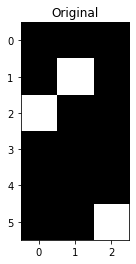

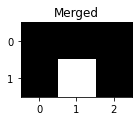

In [ ]:
# Test process_image function
# ------------------------

# Make a 6x3 array of zeros with 255's
# 0   0   0
# 0   255 0
# 255 0   0
# 0   0   0
# 0   0   0
# 0   0   255
A = np.zeros((6, 3), np.uint8)
A[1, 1] = 255
A[2, 0] = 255
A[5, 2] = 255

# This should display a 2 x 3 image with one white pixel at (1, 1)
print('Testing processing image...')

plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.show()
print()

merged = process_image(A)
rgb = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(2,3))
plt.imshow(rgb)
plt.title('Merged')
plt.show()

In [ ]:
def read_and_align(filename):
    '''
    Given a filename as a string, e.g., 'test.jpg', this function will
    - read in the image
    - convert it to grayscale
    - display the grayscale image
    - call process_image to split and merge the channels
    - display the aligned final image
    '''

    img = cv2.imread(filename)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap = 'gray')
    plt.show()
    processed_img = process_image(gray_img)
    processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(processed_img)
    plt.show()

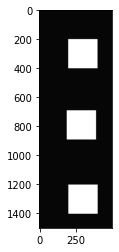

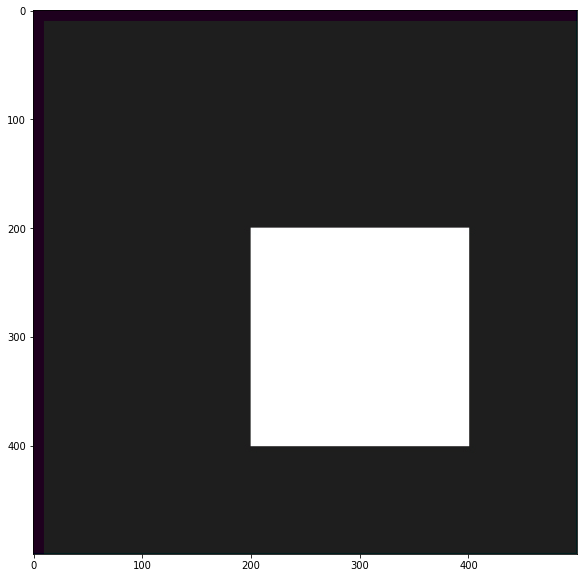

In [ ]:
# Test read_and_align function with test.jpg
# --------------------------------------------
# Should display a single white square on a black background.
image_name = 'test.jpg'
read_and_align(image_name)


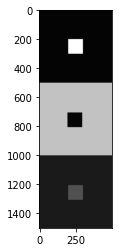

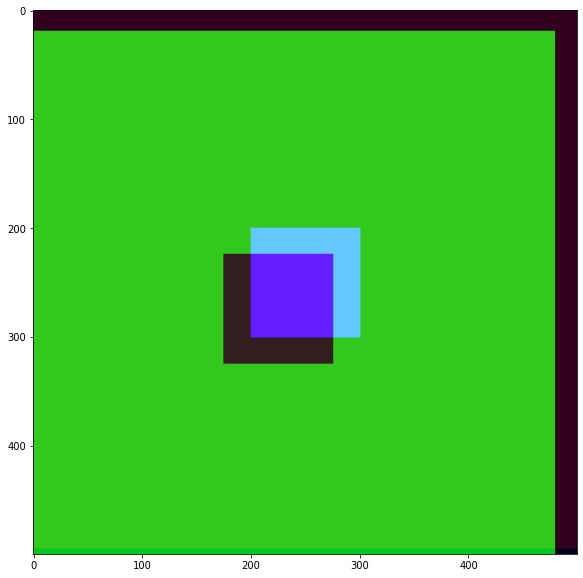

In [ ]:
# Test read_and_align function with test2.jpg
# --------------------------------------------
# Ideally would display a single blue box on a green background,
# but probably won't work quite right.
image_name = 'test2.jpg'
read_and_align(image_name)


Testing tobolsk.jpg...


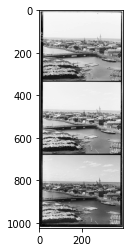

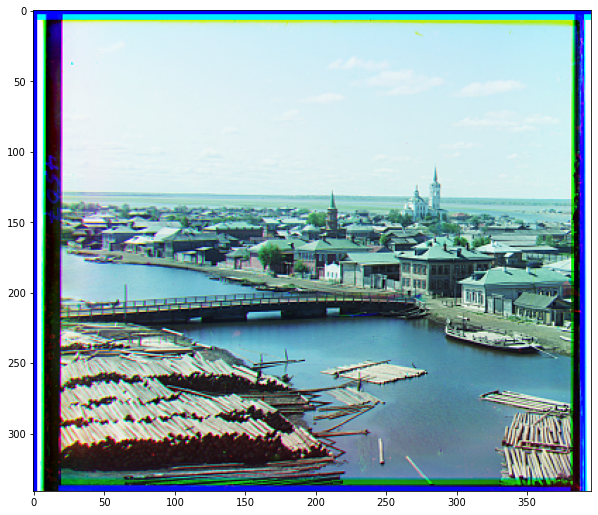


Testing settlers.jpg...


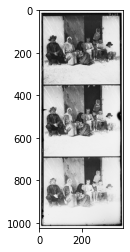

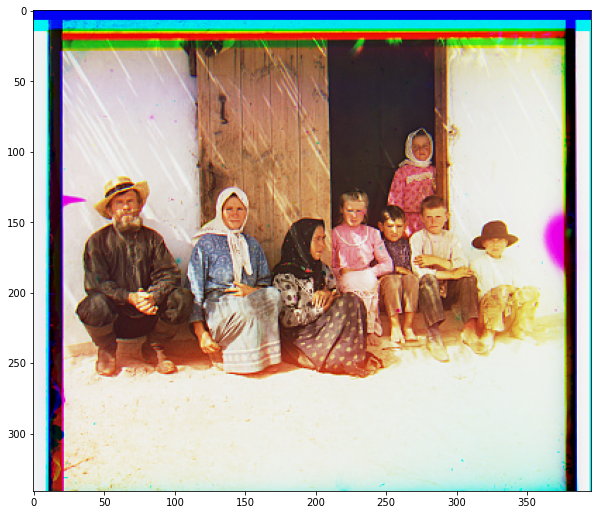


Testing cathedral.jpg...


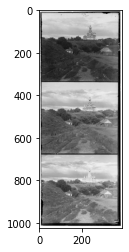

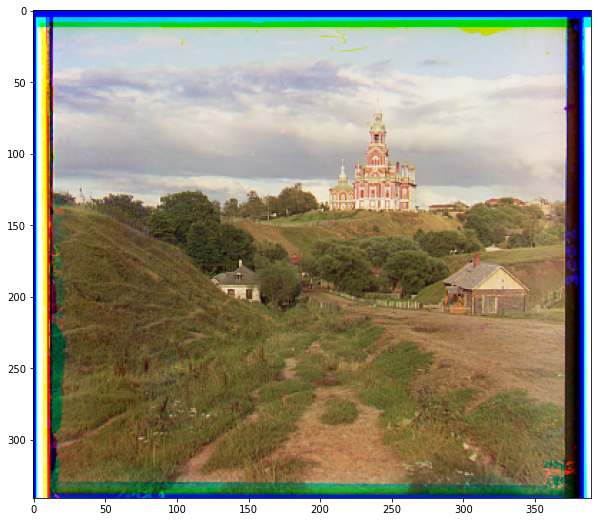


Testing monastery.jpg...


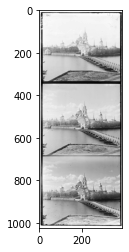

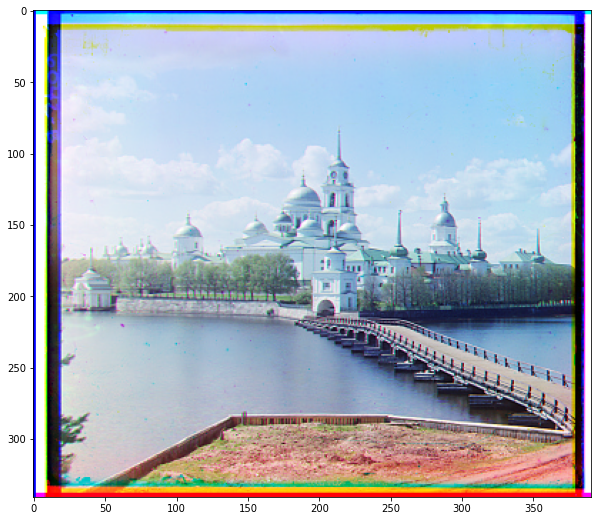

In [ ]:
# Test code with various input images
# --------------------------------------------
image_filenames = ['tobolsk.jpg', 
                   'settlers.jpg', 
                   'cathedral.jpg', 
                   'monastery.jpg']

for image_name in image_filenames:
    print(f'Testing {image_name}...')
    read_and_align(image_name)
    print()
